# MP Neuron

This notebook gives a idea on the code of how MP neuron model is build

Conditon for MP neuron:

$y = \sum_ix_i >= b$

Input : Binary values

Output : Binary values

In [1]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [3]:
X = breast_cancer.data
y = breast_cancer.target

In [4]:
print(X)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [5]:
print(X.shape, y.shape)

(569, 30) (569,)


In [6]:
data = pd.DataFrame(breast_cancer.data, columns= breast_cancer.feature_names)
data['class'] = breast_cancer.target

In [7]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [9]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


### Train test split

In [10]:
X = data.drop('class', axis = 1)
y = data['class']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [12]:
# Shape of train data
print(X_train.shape, X_test.shape)

(426, 30) (143, 30)


In [13]:
# Shape of test data
print(y_train.shape, y_test.shape)

(426,) (143,)


### Binarisation of Input

As the input recieved by the MP neuron will be in the form of binary , we need to convert the data into binary

In [14]:
X_binarised_train = X_train.apply(pd.cut, bins = 2, labels = [1,0])
X_binarised_test = X_test.apply(pd.cut, bins = 2, labels = [1,0])

#### Visualize the input data

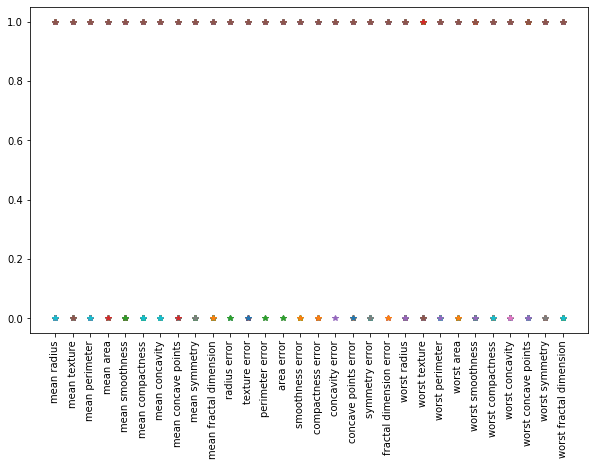

In [15]:
plt.figure(figsize=(10,6))
plt.plot(X_binarised_train.T, '*')
plt.xticks(rotation = 'vertical')
plt.show()

In [16]:
type(X_binarised_train)

pandas.core.frame.DataFrame

In [17]:
# converting the data to numpy arrays

X_binarised_train = X_binarised_train.values
X_binarised_test = X_binarised_test.values

In [18]:
print(type(X_binarised_train))
print(type(X_binarised_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## MP Neuron Model

In [19]:
for b in range(X_binarised_train.shape[1] + 1):
   y_pred_train = []
   accurate_rows = 0

   for x,y in zip(X_binarised_train,y_train):
       y_pred = np.sum(x)>= b
       y_pred_train.append(y_pred)
       accurate_rows += (y == y_pred)

   print(b, accurate_rows/X_binarised_train.shape[0])

0 0.6291079812206573
1 0.6291079812206573
2 0.6291079812206573
3 0.6291079812206573
4 0.6291079812206573
5 0.6291079812206573
6 0.6291079812206573
7 0.6291079812206573
8 0.6291079812206573
9 0.6291079812206573
10 0.6291079812206573
11 0.6291079812206573
12 0.6291079812206573
13 0.6314553990610329
14 0.6338028169014085
15 0.636150234741784
16 0.6384976525821596
17 0.6525821596244131
18 0.6572769953051644
19 0.6666666666666666
20 0.6784037558685446
21 0.6995305164319249
22 0.7089201877934272
23 0.7370892018779343
24 0.7652582159624414
25 0.7934272300469484
26 0.823943661971831
27 0.852112676056338
28 0.8568075117370892
29 0.8169014084507042
30 0.755868544600939


From the above we can see that for value of b as 28 , the accuracy is highest

### Finding the accuracy with the same 'b'value on the test data

In [20]:
from sklearn.metrics import accuracy_score

b = 28
y_pred_test = []

for x in X_binarised_test:
   y_pred = (np.sum(x)>=b)
   y_pred_test.append(y_pred)
accuracy = accuracy_score(y_pred_test,y_test)

print(b,accuracy*100)

28 79.02097902097903


So the training accuracy is 85.6 % and the testing accuracy is 79% 

## MP Neuron class

Creation of MP neuron class

In [21]:
class MPNeuron:
  def __init__(self):
    self.b = None

  def model(self,x):
    return (sum(x) >= self.b)

  def predict(self,X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self, X, Y):
    accuracy = {}

    for b in range(X.shape[1]+1):
      self.b = b
      Y_predict = self.predict(X)
      accuracy[b] = accuracy_score(Y_predict,Y)

    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b

    print('Optimal value of b', best_b)  
    print('Highest accuracy', accuracy[best_b])

  

Now predict the best accuracy and for which value of b on train data

In [22]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train,y_train)

Optimal value of b 28
Highest accuracy 0.8568075117370892


Now predict the accuracy for value of b=28

In [23]:
Y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred,y_test)
print('Test accuracy for b = 28', accuracy_test)

Test accuracy for b = 28 0.7902097902097902
